In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import RocCurveDisplay
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.metrics import precision_recall_curve

In [2]:
df = pd.read_csv('heart_failure_clinical_records_dataset.csv')

In [3]:
print(df.head())

    age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2       

In [4]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [5]:
print(df.describe())

              age     anaemia  creatinine_phosphokinase    diabetes  \
count  299.000000  299.000000                299.000000  299.000000   
mean    60.833893    0.431438                581.839465    0.418060   
std     11.894809    0.496107                970.287881    0.494067   
min     40.000000    0.000000                 23.000000    0.000000   
25%     51.000000    0.000000                116.500000    0.000000   
50%     60.000000    0.000000                250.000000    0.000000   
75%     70.000000    1.000000                582.000000    1.000000   
max     95.000000    1.000000               7861.000000    1.000000   

       ejection_fraction  high_blood_pressure      platelets  \
count         299.000000           299.000000     299.000000   
mean           38.083612             0.351171  263358.029264   
std            11.834841             0.478136   97804.236869   
min            14.000000             0.000000   25100.000000   
25%            30.000000             0.0

In [6]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

In [7]:
duplicate = df[df.duplicated()]
print("Duplicate Rows :")
duplicate

Duplicate Rows :


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT


In [8]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB
None


In [9]:
df.size

3887

In [10]:
X = df.drop('DEATH_EVENT', axis=1)

In [11]:
y = df['DEATH_EVENT']

In [12]:
df.dtypes

age                         float64
anaemia                       int64
creatinine_phosphokinase      int64
diabetes                      int64
ejection_fraction             int64
high_blood_pressure           int64
platelets                   float64
serum_creatinine            float64
serum_sodium                  int64
sex                           int64
smoking                       int64
time                          int64
DEATH_EVENT                   int64
dtype: object

<AxesSubplot:>

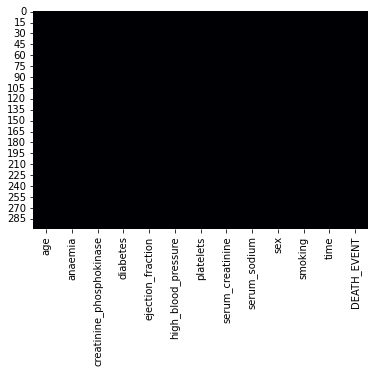

In [13]:
sns.heatmap(df.isnull(),cmap = 'magma',cbar = False)

In [14]:
def missing_values_table(dataset):
        # Total missing values
        
        miss_val = df.isnull().sum()
        
        # Percentage of missing values
        
        miss_val_percent = 100 * df.isnull().sum() / len(df)
        
        # Make a table with the results
        
        miss_val_tab = pd.concat([miss_val, miss_val_percent], axis=1)
        
        # Rename the columns
        
        miss_val_tab_ren_columns = miss_val_tab.rename(
        columns = {0 : 'Missing Values', 1 : '% of Total Values'})
        
        # Sort the table by percentage of missing descending
        
        miss_val_tab_ren_columns = miss_val_tab_ren_columns[
            miss_val_tab_ren_columns.iloc[:,1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
        
        # Print some summary information
        
        print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
            "There are " + str(miss_val_tab_ren_columns.shape[0]) +
              " columns that have missing values.")
        
        # Return the dataframe with missing information
        
        return miss_val_tab_ren_columns

In [15]:
missing= missing_values_table(df)
missing

Your selected dataframe has 13 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


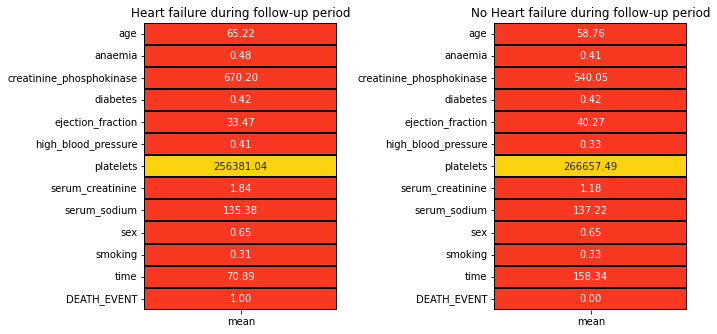

In [16]:
yes = df[df['DEATH_EVENT'] == 1].describe().T
no = df[df['DEATH_EVENT'] == 0].describe().T
colors = ['#F93822','#FDD20E']

fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (10,5))
plt.subplot(1,2,1)
sns.heatmap(yes[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f',)
plt.title('Heart failure during follow-up period');

plt.subplot(1,2,2)
sns.heatmap(no[['mean']],annot = True,cmap = colors,linewidths = 0.4,linecolor = 'black',cbar = False,fmt = '.2f')
plt.title('No Heart failure during follow-up period');

fig.tight_layout(pad = 2)

In [17]:
# Creating a heatmap of the correlation matrix
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,1.000000,0.088006,-0.081584,-0.101012,0.060098,0.093289,-0.052354,0.159187,-0.045966,0.065430,0.018668,-0.224068,0.253729
anaemia,0.088006,1.000000,-0.190741,-0.012729,0.031557,0.038182,-0.043786,0.052174,0.041882,-0.094769,-0.107290,-0.141414,0.066270
creatinine_phosphokinase,-0.081584,-0.190741,1.000000,-0.009639,-0.044080,-0.070590,0.024463,-0.016408,0.059550,0.079791,0.002421,-0.009346,0.062728
diabetes,-0.101012,-0.012729,-0.009639,1.000000,-0.004850,-0.012732,0.092193,-0.046975,-0.089551,-0.157730,-0.147173,0.033726,-0.001943
ejection_fraction,0.060098,0.031557,-0.044080,-0.004850,1.000000,0.024445,0.072177,-0.011302,0.175902,-0.148386,-0.067315,0.041729,-0.268603
high_blood_pressure,0.093289,0.038182,-0.070590,-0.012732,0.024445,1.000000,0.049963,-0.004935,0.037109,-0.104615,-0.055711,-0.196439,0.079351
platelets,-0.052354,-0.043786,0.024463,0.092193,0.072177,0.049963,1.000000,-0.041198,0.062125,-0.125120,0.028234,0.010514,-0.049139
serum_creatinine,0.159187,0.052174,-0.016408,-0.046975,-0.011302,-0.004935,-0.041198,1.000000,-0.189095,0.006970,-0.027414,-0.149315,0.294278
serum_sodium,-0.045966,0.041882,0.059550,-0.089551,0.175902,0.037109,0.062125,-0.189095,1.000000,-0.027566,0.004813,0.087640,-0.195204
sex,0.065430,-0.094769,0.079791,-0.157730,-0.148386,-0.104615,-0.125120,0.006970,-0.027566,1.000000,0.445892,-0.015608,-0.004316


## Comparision of Highly correlated column with the Target column

### Time Vs Death Event

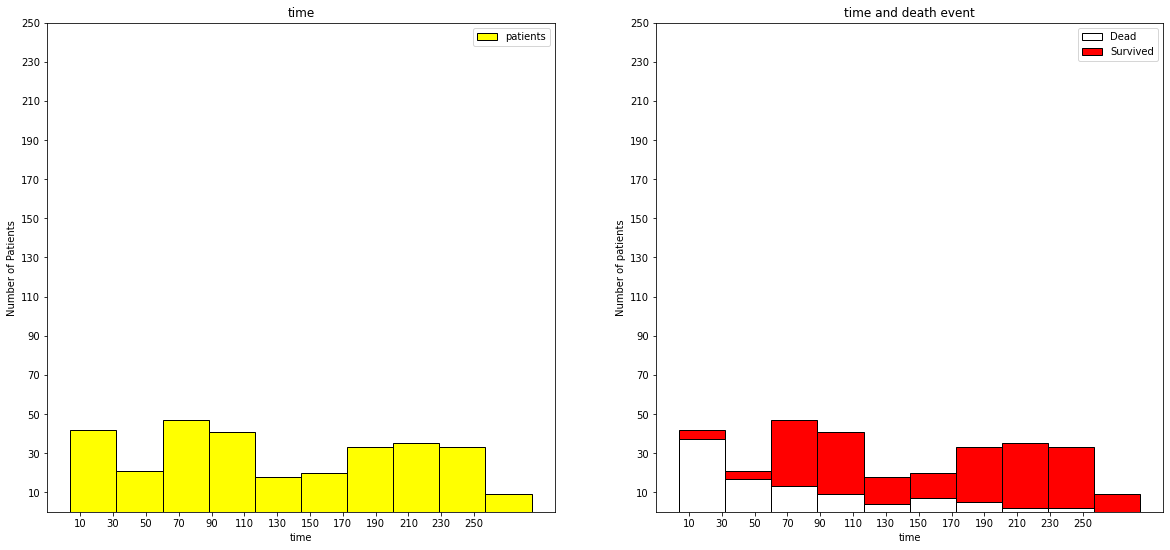

In [18]:
fig, ax = plt.subplots(1, 2, figsize=(20,9))

# plot 1
ax[0].hist(df['time'], color='yellow', label='patients' , edgecolor='black')
ax[0].set_yticks ([10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210, 230, 250]) 
ax[0].set_xticks([10, 30,50, 70, 90, 110, 130, 150, 170, 190, 210, 230, 250])
ax[0].set_xlabel('time')
ax[0].set_ylabel('Number of Patients')
ax[0].legend()
ax[0].set_title('time')
                 
# plot 2
ax[1].hist(x=[df[df['DEATH_EVENT'] == 1]['time'], df[df['DEATH_EVENT'] == 0]['time']],
           stacked=True, color=['white','red'], edgecolor='black', label= ['Dead','Survived'])
ax[1].set_yticks([10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210, 230, 250]) 
ax[1].set_xticks([10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210, 230, 250]) 
ax[1].set_xlabel('time')
ax[1].set_ylabel('Number of patients')
ax[1].set_title('time and death event')
ax[1].legend()
plt.show()

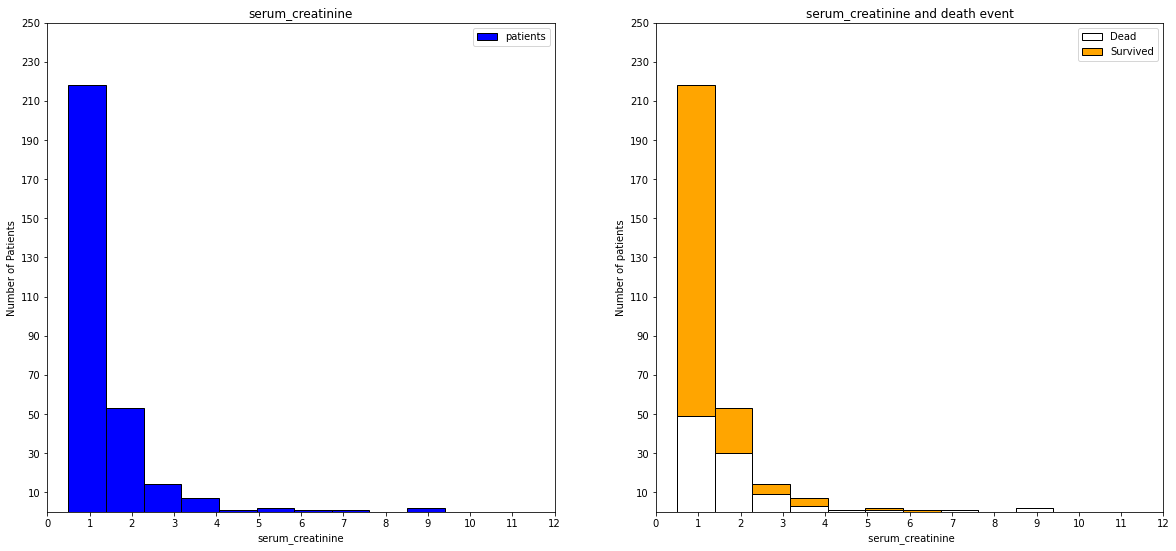

In [19]:
fig, ax = plt.subplots(1, 2, figsize= (20, 9))
#DLOt 7
ax[0].hist(df['serum_creatinine'], color='blue', label='patients', edgecolor='black') 
ax[0].set_yticks([10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210, 230, 250]) 
ax[0].set_xticks ([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
ax[0].set_xlabel('serum_creatinine')
ax[0].set_ylabel('Number of Patients')
ax[0].legend()
ax[0].set_title('serum_creatinine')
                 
# plot 2
ax[1].hist(x=[df[df['DEATH_EVENT'] == 1]['serum_creatinine'], df[df[ 'DEATH_EVENT' ] == 0]['serum_creatinine']],
           stacked=True, color=['white','orange'], edgecolor='black', label=['Dead', 'Survived'])
ax[1].set_yticks([10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210, 230, 250]) 
ax[1].set_xticks([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]) 
ax[1].set_xlabel(' serum_creatinine') 
ax[1].set_ylabel('Number of patients') 
ax[1].set_title('serum_creatinine and death event') 
ax[1].legend()
plt.show()

## Comparision with actual range of serum_creatinine in Human Body


### For adult men, 0.74 to 1.35 mg/dL
### For adult women, 0.59 to 1.04 mg/dL

In [20]:
men_count = len(df[(df['sex'] == 0) & (df['serum_creatinine'] >= 0.74) & (df['serum_creatinine'] <= 1.35)])
women_count = len(df[(df['sex'] == 1) & (df['serum_creatinine'] >= 0.59) & (df['serum_creatinine'] <= 1.04)])
print (men_count) # Normal 
print (women_count) # Normal
print("____")
men_count = len(df[(df['sex'] == 0) & ((df['serum_creatinine'] < 0.74) | (df['serum_creatinine'] > 1.35))])
women_count = len(df[(df['sex'] == 1) & ((df['serum_creatinine'] < 0.59) | (df['serum_creatinine'] > 1.04))])
print (men_count) # Abnormal 
print (women_count) #Abnormal

71
78
____
34
116


### Normal serum creatinine range found in 71 men and in 78 women

### Abnormal serum creatinine range found in 34 men and 116 women

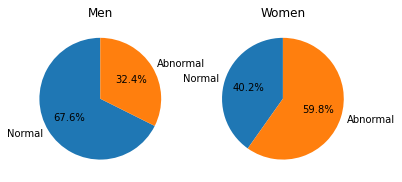

In [21]:
import matplotlib.pyplot as plt

# Calculate counts for normal and abnormal ranges in men and women
men_normal = len(df[(df['sex'] == 0) & (df['serum_creatinine'] >= 0.74) & (df['serum_creatinine'] <= 1.35)])
men_abnormal = len(df[(df['sex'] == 0) & ((df ['serum_creatinine'] < 0.74) | (df['serum_creatinine'] > 1.35))])
women_normal = len(df[(df['sex'] == 1) & (df['serum_creatinine'] >= 0.59) & (df['serum_creatinine'] <= 1.04)])
women_abnormal = len(df[(df['sex'] == 1) & ((df['serum_creatinine'] < 0.59) | (df['serum_creatinine'] > 1.04))])
                     
# Create data and labels for pie chart
men_labels = ['Normal','Abnormal']
men_data = [men_normal, men_abnormal]
women_labels = ['Normal','Abnormal']
women_data = [women_normal, women_abnormal]
                     
# Create subplots for men and women
fig, (ax1, ax2) = plt.subplots(1, 2)
                     
# Plot men's pie chart
ax1.pie(men_data, labels=men_labels, autopct='%1.1f%%', startangle=90)
ax1.set_title('Men')
                     
# Plot women's nie chant
ax2.pie(women_data, labels=women_labels, autopct='%1.1f%%', startangle=90) 
ax2.set_title('Women')
                     
# Show plot
plt.show()

## Ejection fraction Vs Death Event

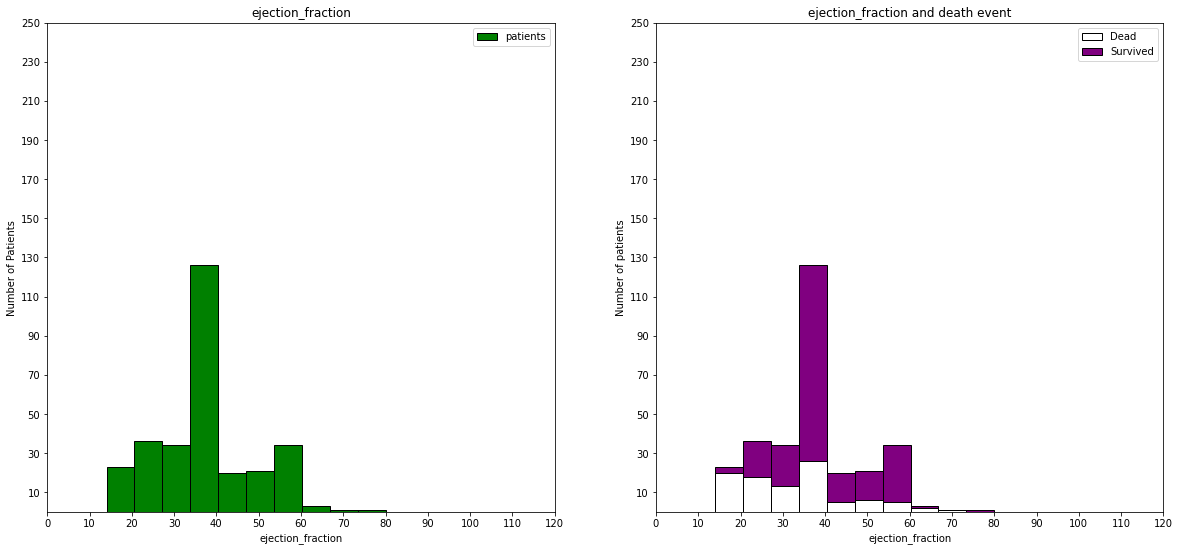

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(20, 9))

# plot 1
ax[0].hist(df['ejection_fraction'], color='green', label='patients', edgecolor='black') 
ax[0].set_yticks ([10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210, 230, 250])
ax[0].set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]) 
ax[0].set_xlabel('ejection_fraction')
ax[0].set_ylabel('Number of Patients') 
ax[0].legend() 
ax[0].set_title('ejection_fraction')

# plot 2
ax[1].hist(x=[df[df['DEATH_EVENT'] == 1]['ejection_fraction'], df[df['DEATH_EVENT'] == 0]['ejection_fraction']],
           stacked=True, color=['white','purple'], edgecolor='black', label=['Dead', 'Survived'])
ax[1].set_yticks ([10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210, 230, 250])
ax[1].set_xticks([0, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120]) 
ax[1].set_xlabel ('ejection_fraction') 
ax[1].set_ylabel ('Number of patients') 
ax[1].set_title('ejection_fraction and death event') 
ax[1].legend()
plt.show()

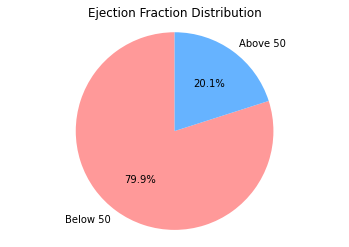

In [23]:
import matplotlib.pyplot as plt

# Get the counts of eiection fraction values below and above 56

below_50 = len(df[df['ejection_fraction'] < 50])
above_50 = len(df[df['ejection_fraction']>=50])
# Create a pie chart
labels = ['Below 50','Above 50']
sizes = [below_50, above_50]
colors = ['#ff9999', '#66b3ff']
figi, ax1 = plt. subplots ()
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%', startangle=90)
# Add title and display the pie chart
ax1.set_title('Ejection Fraction Distribution')
plt.axis('equal')
plt. show()

## Creatinine_ phosphokinase Vs Death Event

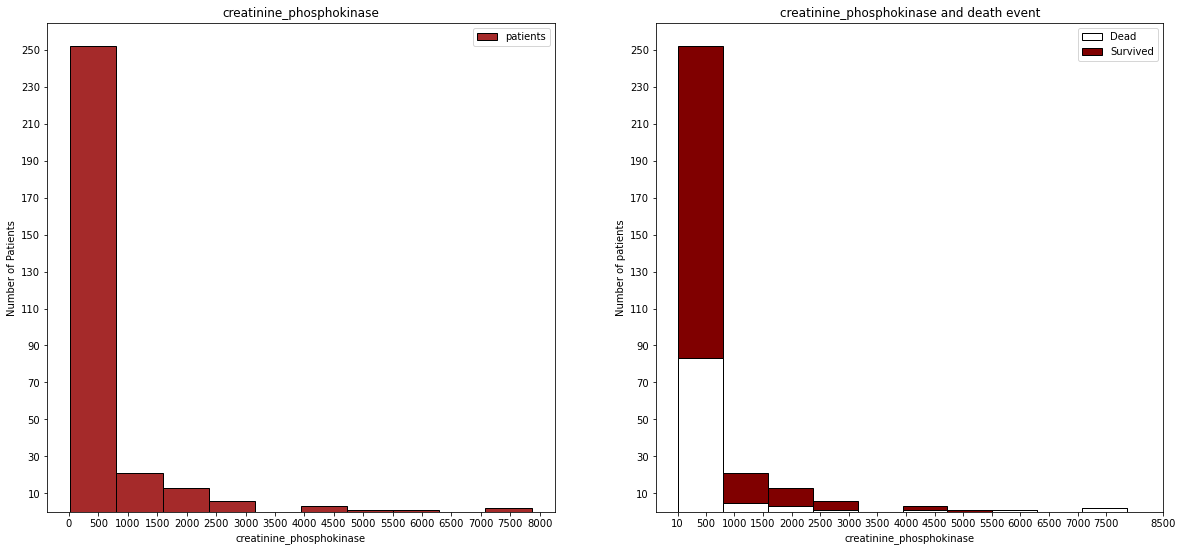

In [24]:
fig, ax = plt.subplots(1, 2, figsize=(20, 9))

# plot 1
ax[0].hist(df['creatinine_phosphokinase'], color='brown', label='patients', edgecolor='black') 
ax[0].set_yticks([10, 30, 50, 70, 90, 110, 130, 150, 170, 190, 210, 230, 250])
ax[0].set_xticks([0, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8000])
ax[0].set_xlabel('creatinine_phosphokinase') 
ax[0].set_ylabel('Number of Patients') 
ax[0].legend ()
ax[0].set_title('creatinine_phosphokinase')
                
# plot 2
ax[1].hist(x=[df[df['DEATH_EVENT'] == 1]['creatinine_phosphokinase'], df[df['DEATH_EVENT'] == 0 ]['creatinine_phosphokinase']],
           stacked=True, color=['white','maroon'], edgecolor='black', label=['Dead', 'Survived'])
ax[1].set_yticks ([10,30, 50,70, 90, 110, 130, 150, 170, 190, 210, 230, 250])
ax[1].set_xticks([10, 500, 1000, 1500, 2000, 2500, 3000, 3500, 4000, 4500, 5000, 5500, 6000, 6500, 7000, 7500, 8500]) 
ax[1].set_xlabel('creatinine_phosphokinase')
ax[1].set_ylabel('Number of patients') 
ax[1].set_title('creatinine_phosphokinase and death event') 
ax[1].legend()
plt. show()

### From the above graph it found more death event when the patient have creatinine phosphokinase is between        0 to 700 and death event also depend on the various factor.

In [25]:
# Count the number of patients with creatinine_phosphokinase within the correct range
cpk_correct_count = len(df[(df['creatinine_phosphokinase'] >= 10) & (df['creatinine_phosphokinase'] <= 120)])

# Count the number of patients with creatinine_phosphokinase outside the correct range
cpk_incorrect_count = len(df[(df['creatinine_phosphokinase'] < 10) | (df['creatinine_phosphokinase'] > 120)])

# Print the counts
print('Number of patients with creatinine phosphokinase within the correct range:',cpk_correct_count) 
print('Number of patients with creatinine_phosphokinase outside the correct range:', cpk_incorrect_count)


Number of patients with creatinine phosphokinase within the correct range: 77
Number of patients with creatinine_phosphokinase outside the correct range: 222


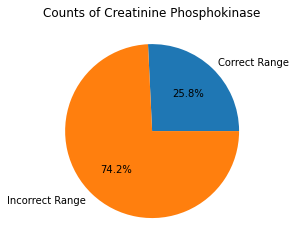

In [26]:
import matplotlib.pyplot as plt

# Create a list of the counts
counts = [cpk_correct_count, cpk_incorrect_count]

# Create a list of the labels
labels = ['Correct Range', 'Incorrect Range']

# Create a pie chart
plt.pie(counts, labels=labels, autopct='%1.1f%%')

# Add a title
plt.title('Counts of Creatinine Phosphokinase')

# Show the chant
plt.show()

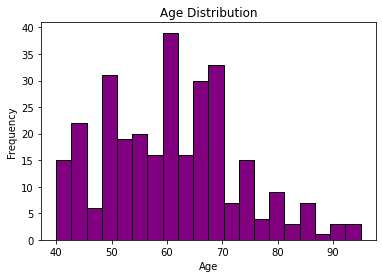

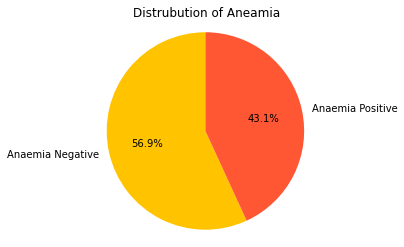

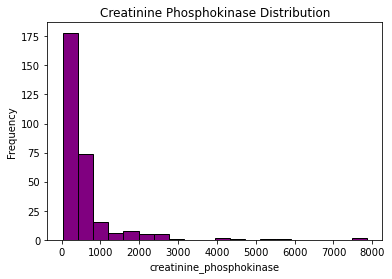

In [27]:
plt.hist(df['age'], bins=20, color='purple', edgecolor='black')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()
           
label_map = {0: 'Anaemia Negative', 1: 'Anaemia Positive'}
grouped_data = df.groupby('anaemia').size().reset_index(name= 'counts')
grouped_data['anaemia'] = grouped_data['anaemia'].map(label_map)
colors = ['#FFC300','#FF5733']
plt.pie(grouped_data['counts'], labels=grouped_data['anaemia'], colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distrubution of Aneamia')
plt.axis('equal')
plt.show()
plt.hist(df['creatinine_phosphokinase'], bins=20, color='purple', edgecolor='black') 
plt.xlabel('creatinine_phosphokinase')
plt.ylabel('Frequency')
plt.title('Creatinine Phosphokinase Distribution')
plt.show()

### creatinine_phosphokinase distribution graph, the most frequent numbers are between 0-1000 and there are some outliers.

<function matplotlib.pyplot.show(close=None, block=None)>

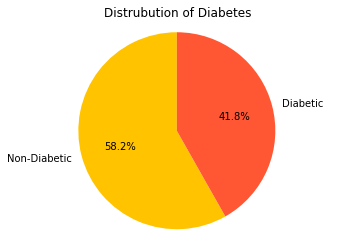

In [28]:
label_map = {0: 'Non-Diabetic', 1: 'Diabetic'}
grouped_data = df.groupby('diabetes').size().reset_index(name='counts')
grouped_data['diabetes'] = grouped_data['diabetes'].map(label_map)
colors = ['#FFC300','#FF5733']
plt.pie(grouped_data['counts'], labels=grouped_data['diabetes'], colors=colors, autopct='%1.1f%%', startangle=90)
plt.title('Distrubution of Diabetes')
plt.axis('equal')
plt.show

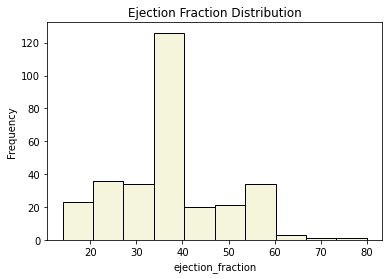

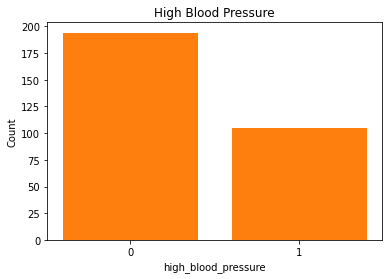

In [29]:
plt.hist(df['ejection_fraction'], bins=10, color='beige', edgecolor='black') 
plt.xlabel('ejection_fraction')
plt.ylabel('Frequency')
plt.title('Ejection Fraction Distribution')
plt.show()

category_col = df['high_blood_pressure']
category_counts = category_col.value_counts()
plt.bar(category_counts.index, category_counts.values)
plt.bar([0,1], category_counts.values) 
plt.xticks([0,1], ['0','1'])
plt.xlabel('high_blood_pressure')
plt.ylabel('Count')
plt.title('High Blood Pressure')
plt.show ()



### Proportion of diabetes graph, the proportion of Non diabetics is bigger than diabetics with 58%
### Ejection_fraction distribution graph seems normally distributed, Also the most frequent values are between 30-40
### High_blood_pressure chart,the high pressure is smaller than no high pressure where high pressure values are around 110 and no high pressure values are around 190


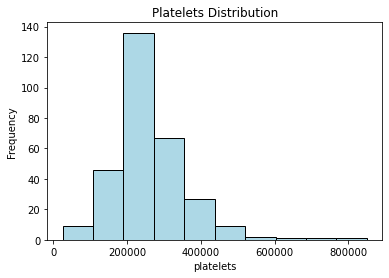

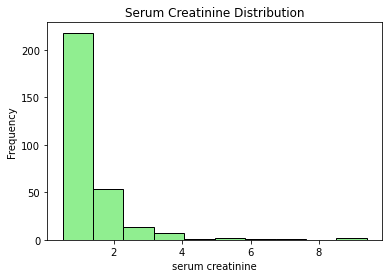

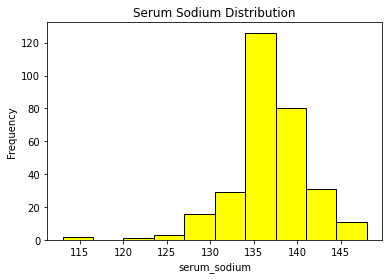

In [30]:
plt.hist(df['platelets'], bins=10, color='lightblue', edgecolor='black')
plt.xlabel('platelets') 
plt.ylabel('Frequency')
plt.title('Platelets Distribution')
plt.show()

plt.hist(df['serum_creatinine'], bins=10, color='lightgreen', edgecolor='black')
plt.xlabel('serum creatinine') 
plt.ylabel('Frequency')
plt.title('Serum Creatinine Distribution')
plt.show()
          
plt.hist(df['serum_sodium'], bins=10, color='yellow', edgecolor='black') 
plt.xlabel('serum_sodium') 
plt.ylabel('Frequency')
plt.title('Serum Sodium Distribution')
plt.show()

### Platelets distribution graph, the most frequent numbers are between 200000-400000 and there are some outliers.
### Serum_creatinine distribution graph, the most frequent numbers are between 0-2 and there are some outliers.
### Serum_sodium distribution graph seems normally distributed with lift-skewed, the most frequent numbers are between 135-140

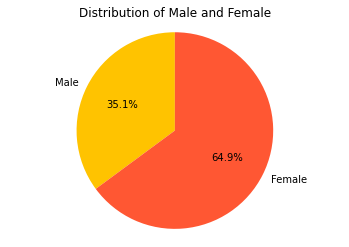

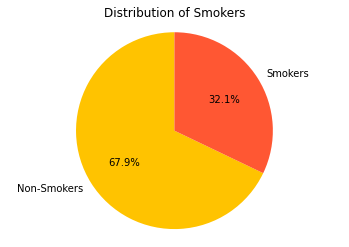

In [31]:
label_map = {0: 'Male', 1: 'Female'}
grouped_data = df.groupby('sex').size().reset_index(name='counts')
grouped_data['sex'] = grouped_data['sex'].map(label_map)
colors = ['#FFC300','#FF5733']
plt.pie(grouped_data['counts'], labels=grouped_data['sex'], colors=colors, autopct='%1.1f%%', startangle=90) 
plt.title('Distribution of Male and Female') 
plt.axis('equal') 
plt.show()
label_map = {0: 'Non-Smokers', 1: 'Smokers'}
grouped_data = df.groupby('smoking').size().reset_index(name='counts')
grouped_data['smoking'] = grouped_data['smoking'].map(label_map)
colors = ['#FFC300','#FF5733']
plt.pie(grouped_data['counts'], labels=grouped_data['smoking'], colors=colors, autopct='%1.1f%%', startangle=90) 
plt.title('Distribution of Smokers') 
plt.axis('equal')
plt.show()

### Proportion of smoking graph, we can see that the proportion of non-smokers is bigger than smokers with 68%

### Proportion of Death Event graph, the proportion of survival is bigger than died with 68%

<AxesSubplot:>

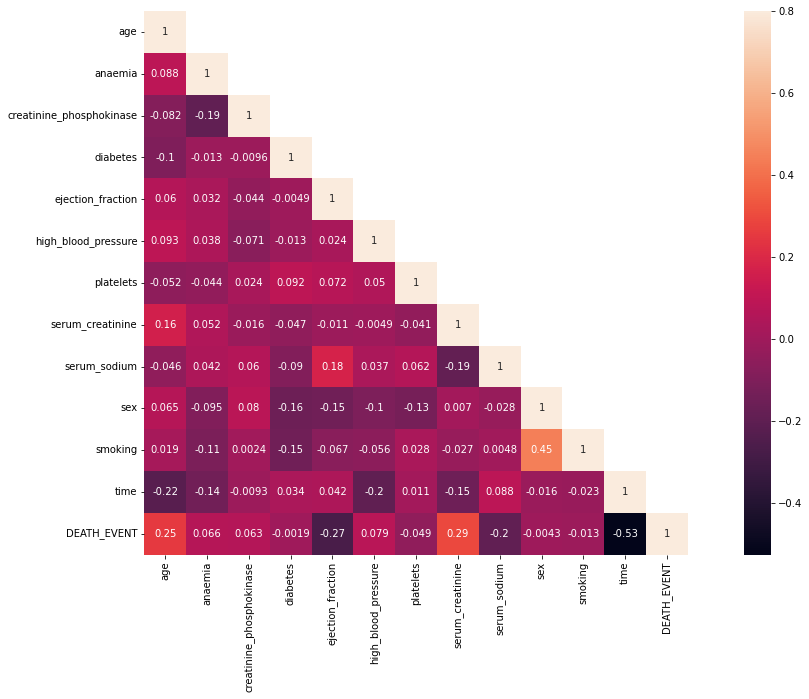

In [32]:
corrMatt = df.corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots( )
fig.set_size_inches(20,10)
sns.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

In [33]:
print('Covariance:')
df.cov()

Covariance:


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
age,141.486483,0.519335,-9.415915e+02,-0.593633,8.460237,0.530565,-6.090712e+04,1.958845,-2.412544,0.372120,0.103847,-206.861351,1.411454
anaemia,0.519335,0.246122,-9.181641e+01,-0.003120,0.185282,0.009057,-2.124536e+03,0.026777,0.091681,-0.022480,-0.024893,-5.445142,0.015376
creatinine_phosphokinase,-941.591531,-91.816413,9.414586e+05,-4.620581,-506.174452,-32.748805,2.321533e+06,-16.470382,254.956443,37.017261,1.098696,-703.803618,28.464468
diabetes,-0.593633,-0.003120,-4.620581e+00,0.244102,-0.028361,-0.003008,4.454928e+03,-0.024010,-0.195226,-0.037261,-0.034006,1.293259,-0.000449
ejection_fraction,8.460237,0.185282,-5.061745e+02,-0.028361,140.063455,0.138325,8.354524e+04,-0.138379,9.185787,-0.839667,-0.372573,38.330464,-1.486667
high_blood_pressure,0.530565,0.009057,-3.274880e+01,-0.003008,0.138325,0.228614,2.336480e+03,-0.002441,0.078292,-0.023916,-0.012458,-7.289904,0.017744
platelets,-60907.118586,-2124.535856,2.321533e+06,4454.928228,83545.241001,2336.480427,9.565669e+09,-4168.399498,26810.436905,-5851.104689,1291.447854,79811.066099,-2247.619159
serum_creatinine,1.958845,0.026777,-1.647038e+01,-0.024010,-0.138379,-0.002441,-4.168399e+03,1.070211,-0.863173,0.003448,-0.013263,-11.988935,0.142374
serum_sodium,-2.412544,0.091681,2.549564e+02,-0.195226,9.185787,0.078292,2.681044e+04,-0.863173,19.469956,-0.058158,0.009932,30.014152,-0.402819
sex,0.372120,-0.022480,3.701726e+01,-0.037261,-0.839667,-0.023916,-5.851105e+03,0.003448,-0.058158,0.228614,0.099706,-0.579224,-0.000965


# Modeling

In [34]:
#input
data_1 = df.drop('DEATH_EVENT', axis=1)
data_1 = np.array(data_1, dtype=int)
#output
target_1 = df['DEATH_EVENT']
target_1 = np.array(target_1, dtype=int)

In [35]:
#Calling some extra libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
# splitting the data for training and testing
x_train, x_test, y_train, y_test = train_test_split(data_1, target_1, test_size=0.2, random_state=4)

In [36]:
pip install eli5 --upgrade

Note: you may need to restart the kernel to use updated packages.


# Logistic Regression

In [37]:

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


In [38]:
X.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time'],
      dtype='object')

In [39]:
feature_names =['age','anaemia','creatinine_phosphokinase','ejection_fraction',
'high_blood _pressure','platelets','serum creatinine', 'serum_sodium',
'sex','smoking','diabetes','time']

In [40]:
import eli5
# Create a loaistic Rearession model.
lr_model = LogisticRegression()
# Fit the model to your data
lr_model.fit(x_train, y_train)
# Use elis to visualize the feature weights
eli5.show_weights(lr_model, feature_names=feature_names)

/Users/jashshah/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Weight?,Feature
+0.052,age
+0.008,sex
+0.007,serum_sodium
+0.001,ejection_fraction
+0.000,smoking
+0.000,anaemia
+0.000,creatinine_phosphokinase
+0.000,<BIAS>
+0.000,diabetes
-0.000,serum creatinine


In [41]:
neg_row = x_test[y_test == 0][0]
# Choose a row from your test data with a positive label
pos_row = x_test[y_test == 1][0]
# Use eli5 to explain the prediction for the negative row
neg_explanation = eli5.explain_prediction(lr_model, neg_row)
# Use eli5 to explain the prediction for the positive row
pos_explanation = eli5.explain_prediction(lr_model, pos_row)
# Print the explanations
print ("Explanation for negative row:")
print (neg_explanation)
print ("Explanation for positive row:")
print (pos_explanation)

Explanation for negative row:
Explanation(estimator='LogisticRegression()', description=None, error=None, method='linear model', is_regression=False, targets=[TargetExplanation(target=0, feature_weights=FeatureWeights(pos=[FeatureWeight(feature='x4', weight=2.5356682685202903, std=None, value=35.0), FeatureWeight(feature='x11', weight=1.7769269633136306, std=None, value=90.0), FeatureWeight(feature='x6', weight=0.21302569287977266, std=None, value=228000.0)], neg=[FeatureWeight(feature='x0', weight=-2.845340799534213, std=None, value=55.0), FeatureWeight(feature='x8', weight=-1.0283976509973614, std=None, value=135.0), FeatureWeight(feature='x2', weight=-0.014067579729875974, std=None, value=60.0), FeatureWeight(feature='x7', weight=-0.007290100139833325, std=None, value=1.0), FeatureWeight(feature='x9', weight=-0.00041791887974423073, std=None, value=1.0), FeatureWeight(feature='<BIAS>', weight=-0.0002135011675569747, std=None, value=1.0), FeatureWeight(feature='x10', weight=-1.969773

In [42]:
from sklearn.metrics import accuracy_score, roc_auc_score
# Evaluate the model on the test set
test_pred = lr_model.predict(x_test)
test_proba = lr_model.predict_proba(x_test)[:, 1]
# Compute accuracy and AUC-ROC score
accuracy = accuracy_score(y_test, test_pred)
auc_roc = roc_auc_score(y_test, test_proba)
print(f"Accuracy: {accuracy: .4f}")
print(f"AUC-ROC: {auc_roc: .4f}")

Accuracy:  0.8333
AUC-ROC:  0.8836


In [43]:
# hyper perameter LR

In [44]:
# Define the hyperparameter grid
param_grid = { 'penalty':['l1','l2''elasticnet'],
              'C':[0.1,1,10, 100, 1000],
              'solver': ['liblinear','saga'],
              'max_iter': [100, 500, 1000],
              'tol' : [0.0001, 0.001, 0.01],
              'class_weight': [None, 'balanced']}

# Create the grid search object
grid_search = GridSearchCV(estimator = LogisticRegression(),
                           param_grid = param_grid,
                           cv = 5,
                           n_jobs = -1,
                           verbose = 2)

# Fit the arid search to the data
grid_search.fit(x_train, y_train)

# Got the hest hunerparametons
best_params = grid_search.best_params_

# Train the model with the best hyperparameters
logreg = LogisticRegression (**best_params)
logreg.fit(x_train, y_train)

Fitting 5 folds for each of 360 candidates, totalling 1800 fits


/Users/jashshah/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jashshah/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jashshah/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jashshah/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jashshah/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jashshah/opt/anaconda3/lib/p

[CV] END C=0.1, class_weight=None, max_iter=100, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.1, class_weight=None, max_iter=100, penalty=l1, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=0.1, class_weight=None, max_iter=100, penalty=l1, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=0.1, class_weight=None, max_iter=100, penalty=l2elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.1, class_weight=None, max_iter=100, penalty=l2elasticnet, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.1, class_weight=None, max_iter=500, penalty=l1, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=0.1, class_weight=None, max_iter=500, penalty=l1, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=0.1, class_weight=None, max_iter=500, penalty=l1, solver=saga, tol=0.01; total time=   0.0s
[CV] END C=0.1, class_weight=None, max_iter=500, penalty=l1, solver=saga, tol=0.01; total time=   0.0s
[CV] END C=0.1, clas

/Users/jashshah/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jashshah/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jashshah/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jashshah/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jashshah/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jashshah/opt/anaconda3/lib/p

[CV] END C=0.1, class_weight=None, max_iter=100, penalty=l1, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=l1, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=l1, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=l1, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=l1, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=l1, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=l1, solver=saga, tol=0.01; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=l1, solver=saga, tol=0.01; total time=   0.0s
[CV] END C=0.1, class_weight=balanced, max_iter=100, penalty=l1, solver=saga, tol=0.01; total time=   0.0s
[CV] END C=0.1, class_weight=b

/Users/jashshah/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jashshah/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jashshah/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jashshah/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jashshah/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jashshah/opt/anaconda3/lib/p

[CV] END C=0.1, class_weight=None, max_iter=100, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.1, class_weight=None, max_iter=100, penalty=l1, solver=saga, tol=0.001; total time=   0.0s
[CV] END C=0.1, class_weight=None, max_iter=100, penalty=l1, solver=saga, tol=0.01; total time=   0.0s
[CV] END C=0.1, class_weight=None, max_iter=100, penalty=l1, solver=saga, tol=0.01; total time=   0.0s
[CV] END C=0.1, class_weight=None, max_iter=100, penalty=l2elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.1, class_weight=None, max_iter=100, penalty=l2elasticnet, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=0.1, class_weight=None, max_iter=100, penalty=l2elasticnet, solver=liblinear, tol=0.01; total time=   0.0s
[CV] END C=0.1, class_weight=None, max_iter=100, penalty=l2elasticnet, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=0.1, class_weight=None, max_iter=100, penalty=l2elasticnet, solver=saga, tol=0.001; total time=   

/Users/jashshah/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jashshah/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jashshah/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jashshah/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jashshah/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/jashshah/opt/anaconda3/lib/p

[CV] END C=0.1, class_weight=None, max_iter=100, penalty=l1, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.1, class_weight=None, max_iter=500, penalty=l1, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.1, class_weight=None, max_iter=500, penalty=l1, solver=liblinear, tol=0.001; total time=   0.0s
[CV] END C=0.1, class_weight=None, max_iter=500, penalty=l1, solver=saga, tol=0.0001; total time=   0.1s
[CV] END C=0.1, class_weight=None, max_iter=500, penalty=l1, solver=saga, tol=0.0001; total time=   0.0s
[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=l2elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=l2elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=l2elasticnet, solver=liblinear, tol=0.0001; total time=   0.0s
[CV] END C=0.1, class_weight=None, max_iter=1000, penalty=l2elasticnet, solver=liblinear, tol=0.001

/Users/jashshah/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
900 fits failed out of a total of 1800.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
900 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/jashshah/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/jashshah/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py", line 1091, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "/Users/jashshah/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_log

LogisticRegression(C=0.1, max_iter=500, penalty='l1', solver='liblinear',
                   tol=0.001)

In [45]:
clf = LogisticRegression(C=0.1, max_iter=1000, penalty='l1', solver='liblinear',
                         tol=0.01)

# Train the model on the training set
clf.fit(x_train,y_train)

# Evaluate the model on the test set
test_pred = clf.predict(x_test)
test_proba = clf.predict_proba(x_test)[:,1]

In [46]:
# Compute accuracy and AUC-ROC score
accuracy = accuracy_score(y_test, test_pred)
auc_roc = roc_auc_score(y_test, test_proba)
print (f"Accuracy: {accuracy: .4f}")
print (f"AUC-ROC: {auc_roc:.4f}")

Accuracy:  0.8500
AUC-ROC: 0.8823


# Decision Tree Classifier

In [47]:
import eli5
from sklearn.tree import DecisionTreeClassifier

In [48]:
dt_model = DecisionTreeClassifier(random_state=0)
dt_model.fit(x_train, y_train)
# Show feature importance
eli5.show_weights(dt_model,feature_names=feature_names)

Weight,Feature
0.4742,time
0.1270,sex
0.1262,high_blood _pressure
0.0708,age
0.0662,creatinine_phosphokinase
0.0524,serum_sodium
0.0407,serum creatinine
0.0389,anaemia
0.0036,diabetes
0,smoking


In [49]:
# Get an explanation for a positive predictior
eli5.show_prediction(dt_model,x_test[0],feature_names=feature_names)



In [50]:
# Get an explanation for a negative prediction
eli5.show_prediction(dt_model, x_test[10],feature_names=feature_names)

In [51]:
from sklearn.metrics import accuracy_score, roc_auc_score
# Make predictions on the test set
y_pred = dt_model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print ("Accuracy:", accuracy)
# Calculate AUC-ROC
proba = dt_model.predict_proba(x_test)[:, 1] # get the probability of positive class)
auc_roc =  roc_auc_score(y_test, proba) 
print ("AUC-ROC:",auc_roc)

Accuracy: 0.8
AUC-ROC: 0.7619047619047619


In [52]:
#Hyperperameter tunning For Decision Tree

In [53]:
# Define the hyperparameter grid
# Define the hyperparameter grid
param_dist = { 
    'criterion': ['gini','entropy'],
    'max_depth': np.arange(1, 21),
    'min_samples_split': np.arange (2, 21),
    'min_samples_leaf': np.arange(1, 21)
}

In [54]:
# Create the Decision Tree Classifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV


dtc = DecisionTreeClassifier(random_state=42)

# Perform randomized search with stratified cross-validation
# Perform randomized search with stratified cross-validation

cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

rand_search = RandomizedSearchCV(dtc, param_distributions=param_dist, cv=cv, n_iter=100, random_state=42)
rand_search.fit(x_train, y_train)

# Get the best mode and predict on test set
best_model = rand_search.best_estimator_
y_pred = best_model.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.8166666666666667


In [55]:
# Calculate AUC-ROC
proba = best_model.predict_proba(x_test)[:, 1] # get the probability of positive class
auc_roc = roc_auc_score(y_test, proba)
print ("AUC-ROC:", auc_roc)

AUC-ROC: 0.8492063492063492


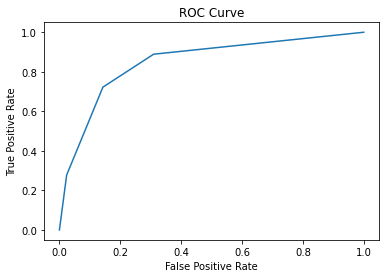

In [56]:
from sklearn.metrics import roc_curve 
import matplotlib.pyplot as plt

# Get FPR. TP. and probability thresholds
fpr, tpr, thresholds = roc_curve(y_test, proba)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive Rate') 
plt.title('ROC Curve') 
plt.show()

# Random Forest Classifier

In [57]:
from sklearn.ensemble import RandomForestClassifier


# Create a random forest classifier
# Create a random forest classifier
rfc = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the model to the training data
rfc.fit(x_train, y_train)
predictions = rfc.predict(x_test)

In [58]:
# Calculate accuracy of the model
accuracy = accuracy_score(y_test, predictions)
print( 'Accuracy:',accuracy)

# Calculate AUC-ROC score of the model
auc_roc = roc_auc_score(y_test, predictions)
print('AUC-ROC score:', auc_roc)


Accuracy: 0.8333333333333334
AUC-ROC score: 0.7857142857142857


In [59]:
!pip install lime


In [60]:
import lime
import lime.lime_tabular

In [61]:
from sklearn.metrics import r2_score
import xgboost as xgb

# Define and train the XGBoost model
model = xgb.XGBRegressor()
model.fit(x_train, y_train)


data_2 = df.drop('DEATH_EVENT', axis=1)
feature_names = df.columns
explainer_rf = lime.lime_tabular.LimeTabularExplainer(data_2.values,
                                                      feature_names=feature_names,
                                                      class_names=['0', '1'],
                                                      discretize_continuous=False)

# Create a LIME explainer for the XGBoost model
explainer_xgb = lime.lime_tabular.LimeTabularExplainer(data_2.values,
                                                       feature_names=feature_names,
                                                       class_names=['0', '1'],
                                                       discretize_continuous=False,
                                                       mode='regression')

# Choose a random instance to explain
instance_idx = np.random.randint(len(data_2))

# Explain the Random Forest model
exp_rf = explainer_rf.explain_instance(data_2.iloc[instance_idx].values, rfc.predict_proba)
print('Random Forest prediction:', rfc.predict([data_2.iloc[instance_idx]])[0])
print('Random Forest explanation:')
for feature, weight in exp_rf.as_list():
    print('{}: {}'.format(feature, weight))

# Explain the XGBoost model
exp_xgb = explainer_xgb.explain_instance(data_2.iloc[instance_idx].values, model.predict)
print('XGBoost prediction:', model.predict([data_2.iloc[instance_idx]])[0])
print('XGBoost explanation:')
for feature, weight in exp_xgb.as_list():
    print('{}: {}'.format(feature, weight))

# Assuming you have the predicted values and the true values
y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)

print('Random Forest linear model coefficients:', exp_rf.local_exp[1])
print('Random Forest linear model intercept:', exp_rf.intercept[1])
print('Random Forest linear model R^2:', r2)
print('XGBoost linear model coefficients:', exp_xgb.local_exp)
print('XGBoost linear model intercept:', exp_xgb.intercept[0])



Random Forest prediction: 0
Random Forest explanation:
time: -0.15852197058808848
ejection_fraction: -0.06817564963312622
serum_creatinine: 0.05991202785711937
age: 0.039877502997425616
serum_sodium: -0.027358028606472882
platelets: -0.012345742586765445
high_blood_pressure: 0.008154234266363677
sex: -0.003312495806316545
smoking: -0.0017970432665641712
diabetes: 0.0014732687919946411
XGBoost prediction: -0.0012145314
XGBoost explanation:
time: -0.18109105753407065
ejection_fraction: -0.09348381004773476
serum_creatinine: 0.05673819791030491
serum_sodium: -0.045230249217765306
platelets: -0.039021859620814905
age: 0.029327569730744792
anaemia: -0.015462221080798838
high_blood_pressure: -0.009922393797607156
diabetes: -0.008036002550327086
sex: -0.006127415227885813
Random Forest linear model coefficients: [(11, -0.15852197058808848), (4, -0.06817564963312622), (7, 0.05991202785711937), (0, 0.039877502997425616), (8, -0.027358028606472882), (6, -0.012345742586765445), (5, 0.008154234266

# SHAP

In [62]:
pip install shap

Note: you may need to restart the kernel to use updated packages.


In [63]:
from sklearn.ensemble import RandomForestClassifier
import shap

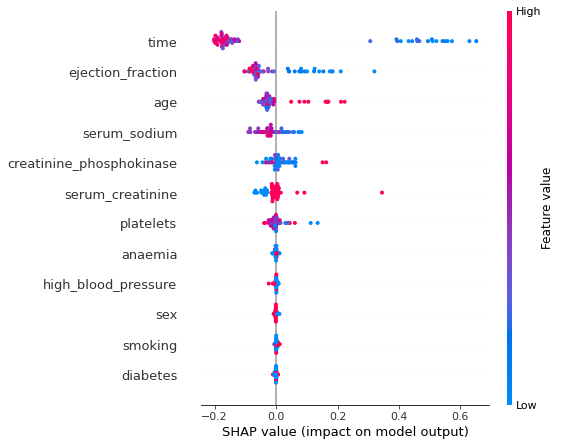

In [64]:
import shap
from sklearn.ensemble import RandomForestRegressor

# Create the RandomForestRegressor model
model_rf = RandomForestRegressor()
model_rf.fit(x_train, y_train)

# Initialize the SHAP explainer
explainer_rf = shap.Explainer(model_rf)

# Compute SHAP values
shap_values_rf = explainer_rf.shap_values(x_test)

# Plot the SHAP summary plot
shap.summary_plot(shap_values_rf, x_test, feature_names=feature_names)




ntree_limit is deprecated, use `iteration_range` or model slicing instead.


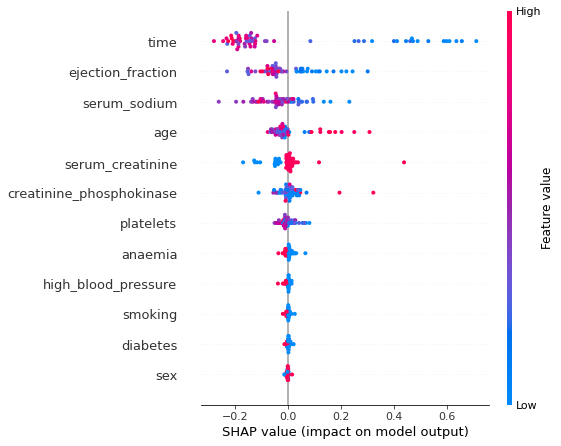

In [65]:
import shap
import xgboost as xgb

# Create the XGBoost model
model_xgb = xgb.XGBRegressor()
model_xgb.fit(x_train, y_train)

# Initialize the SHAP explainer
explainer_xgb = shap.Explainer(model_xgb)

# Compute SHAP values
shap_values_xgb = explainer_xgb.shap_values(x_test)

# Plot the SHAP summary plot
shap.summary_plot(shap_values_xgb, x_test, feature_names=feature_names)


In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier 
 
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

lr = LogisticRegression()
lr.fit(x_train, y_train)

rf = RandomForestClassifier()
rf.fit(x_train, y_train)

dt = DecisionTreeClassifier()
dt.fit(x_train, y_train)


# Predict observations for each model
lr_pred = lr.predict_proba(x_test)
dt_pred = dt.predict_proba(x_test)
rf_pred = rf.predict_proba(x_test)
xgb_pred = xgb.predict_proba(x_test)

# Calculate accuracy for each model
lr_acc = lr.score(x_test, y_test)
dt_acc = dt.score(x_test, y_test)
rf_acc = rf.score(x_test, y_test)
xgb_acc = xgb.score(x_test, y_test)

# Print the results
print("Logistic Regression:")
print("Accuracy:", lr_acc)
print("Predictions (prob_T, prob_F):", lr_pred[0])

print("\nDecision Tree:")
print("Accuracy:", dt_acc)
print("Predictions (prob_T, prob_F):", dt_pred[0])

print("\nRandom Forest:")
print("Accuracy:", rf_acc)
print("Predictions (prob_T, prob_F):", rf_pred[0])

print("\nXGBoost:")
print("Accuracy:", xgb_acc)
print("Predictions (prob_T, prob_F):", xgb_pred[0])

Logistic Regression:
Accuracy: 0.8333333333333334
Predictions (prob_T, prob_F): [0.90028564 0.09971436]

Decision Tree:
Accuracy: 0.8
Predictions (prob_T, prob_F): [1. 0.]

Random Forest:
Accuracy: 0.85
Predictions (prob_T, prob_F): [0.61 0.39]

XGBoost:
Accuracy: 0.8333333333333334
Predictions (prob_T, prob_F): [0.9510441  0.04895594]


lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
